In [2]:
from google.colab import drive
import pandas as pd
import os
import glob

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
!pip install PySastrawi

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.6 MB/s eta 0:00:00


In [4]:
import pandas as pd

# Coba dengan encoding 'latin1'
path = "/content/drive/MyDrive/skripsi/df_translated_temp.csv"

df_final = pd.read_csv(path, encoding='latin1')
df_final.head()

,tweet_url,filtered_cleaned_text,lang,translated_text
0,https://x.com/sofjungk/status/1452263147688108046,jiakh kasi bumil kena mental,id,Jiakh kasi pregnant woman is mentally ill
1,https://x.com/zwkiii/status/1733081341124837377,stress ni bumil,id,stress ni bumil
2,https://x.com/namirelia/status/154139462621689...,baby blues turun kadar hormon hamil dadak habi...,id,Baby Blues drops pregnancy hormone levels sudd...
3,https://x.com/cudhdle/status/1473274530068004870,tarik tangan pelan bumil njir yakali suruh lon...,id,Pull your hand gently Bumil Njir yeskali tell ...
4,https://x.com/amlrmdnt_/status/128234466066123...,pseudocyesis kali yak mola eeh nya usg wkwk,id,pseudocyesis kali yak mola eeh nya ultrasound ...


In [5]:
df_final['translated_text'].duplicated().sum()

np.int64(4122)

In [6]:
df_final_cleaned = df_final.drop_duplicates()

print("Jumlah data setelah menghapus duplikat:", len(df_final_cleaned))

Jumlah data setelah menghapus duplikat: 12963


In [7]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12963 entries, 0 to 13888
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_url              12963 non-null  object
 1   filtered_cleaned_text  12963 non-null  object
 2   lang                   12963 non-null  object
 3   translated_text        12963 non-null  object
dtypes: object(4)
memory usage: 506.4+ KB


In [8]:
sentiments = SentimentIntensityAnalyzer()
df_final_cleaned["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_final_cleaned["translated_text"]]
df_final_cleaned["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_final_cleaned["translated_text"]]
df_final_cleaned["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_final_cleaned["translated_text"]]
df_final_cleaned["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df_final_cleaned["translated_text"]]

/tmp/ipython-input-8-836731996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_final_cleaned["translated_text"]]
/tmp/ipython-input-8-836731996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_final_cleaned["translated_text"]]
/tmp/ipython-input-8-836731996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [9]:
score = df_final_cleaned["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else :
        sentiment.append('Neutral')
df_final_cleaned["Sentiment"] = sentiment

/tmp/ipython-input-9-4235044224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned["Sentiment"] = sentiment


In [10]:
df_final_cleaned

,tweet_url,filtered_cleaned_text,lang,translated_text,Positive,Negative,Neutral,Compound,Sentiment
0,https://x.com/sofjungk/status/1452263147688108046,jiakh kasi bumil kena mental,id,Jiakh kasi pregnant woman is mentally ill,0.000,0.318,0.682,-0.4215,Negative
1,https://x.com/zwkiii/status/1733081341124837377,stress ni bumil,id,stress ni bumil,0.000,0.583,0.417,-0.4215,Negative
2,https://x.com/namirelia/status/154139462621689...,baby blues turun kadar hormon hamil dadak habi...,id,Baby Blues drops pregnancy hormone levels sudd...,0.079,0.226,0.695,-0.7096,Negative
3,https://x.com/cudhdle/status/1473274530068004870,tarik tangan pelan bumil njir yakali suruh lon...,id,Pull your hand gently Bumil Njir yeskali tell ...,0.292,0.000,0.708,0.7351,Positive
4,https://x.com/amlrmdnt_/status/128234466066123...,pseudocyesis kali yak mola eeh nya usg wkwk,id,pseudocyesis kali yak mola eeh nya ultrasound ...,0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...
13884,https://x.com/roseguartz/status/13962986661518...,ya gimana mbak nama kerja jalan untung teman t...,id,"yes, how about the name of the work road to ma...",0.334,0.167,0.499,0.6908,Positive
13885,https://x.com/petrawearsprada/status/162391902...,hamil palsi udah ilmiah ges nama pseudocyesis cek,id,pregnant palsi is already scientific ges name ...,0.000,0.000,1.000,0.0000,Neutral
13886,https://x.com/Koeranta/status/1557220823550660609,mbak bahagia stress eh usia kandung masuk mbak...,id,Happy Stress eh Age of Birth Healthy Pregnant,0.451,0.197,0.352,0.5574,Positive
13887,https://x.com/ohbeshine/status/179397956925668...,hamil hamil wanita alami ubah hormonal picu ga...,id,pregnant pregnant women natural hormonal chang...,0.147,0.382,0.471,-0.6124,Negative


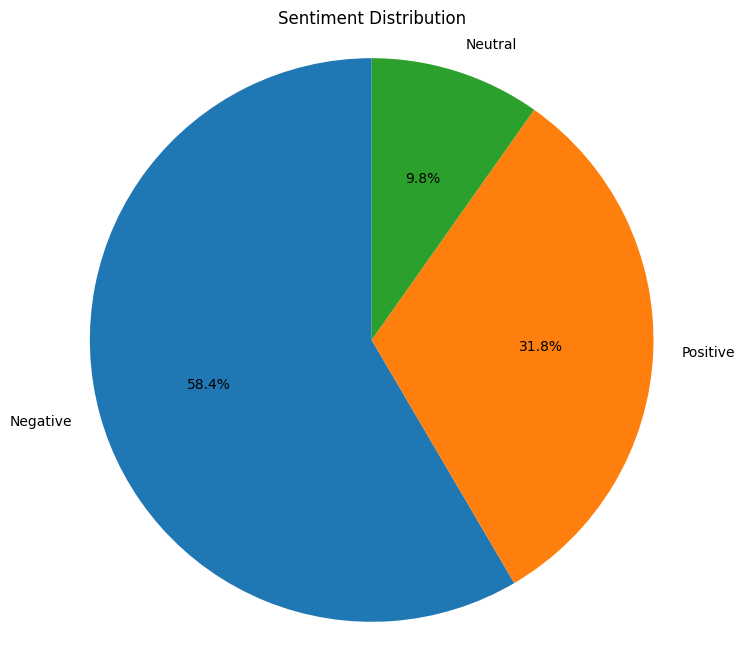

In [11]:
#visualisasi persebaran data pada kolom sentiment pada dataset df_final_cleaned menggunakan pie chart

import matplotlib.pyplot as plt

# Assuming df_final_cleaned is already defined as in your provided code
sentiment_counts = df_final_cleaned['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##SMOTE EVAL

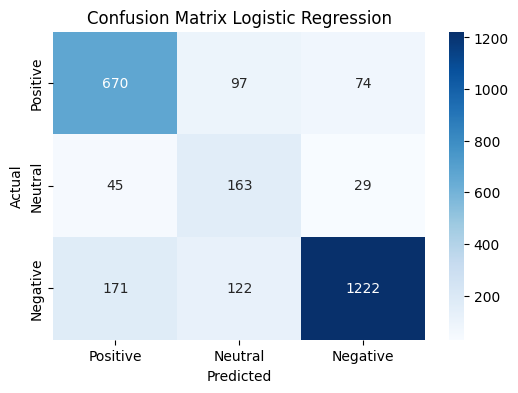

              precision    recall  f1-score   support

    Negative       0.92      0.81      0.86      1515
     Neutral       0.43      0.69      0.53       237
    Positive       0.76      0.80      0.78       841

    accuracy                           0.79      2593
   macro avg       0.70      0.76      0.72      2593
weighted avg       0.82      0.79      0.80      2593



In [16]:
#80:20

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan ini:
from imblearn.over_sampling import SMOTE

# Fitur dan label
X = df_final_cleaned['translated_text']
y = df_final_cleaned['Sentiment']  # Label sentimen dari VADER

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training Logistic Regression
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


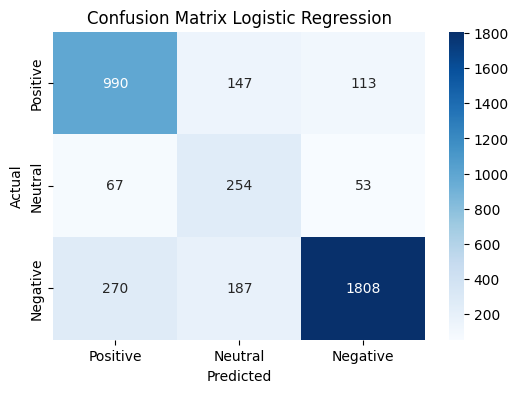

              precision    recall  f1-score   support

    Negative       0.92      0.80      0.85      2265
     Neutral       0.43      0.68      0.53       374
    Positive       0.75      0.79      0.77      1250

    accuracy                           0.78      3889
   macro avg       0.70      0.76      0.72      3889
weighted avg       0.81      0.78      0.79      3889



In [13]:
#70:30
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan ini:
from imblearn.over_sampling import SMOTE

# Fitur dan label
X = df_final_cleaned['translated_text']
y = df_final_cleaned['Sentiment']  # Label sentimen dari VADER

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training Logistic Regression
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

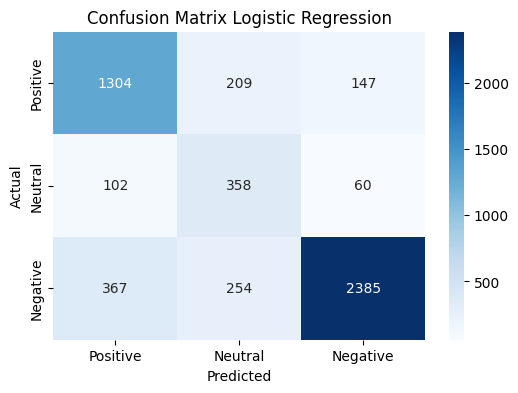

              precision    recall  f1-score   support

    Negative       0.92      0.79      0.85      3006
     Neutral       0.44      0.69      0.53       520
    Positive       0.74      0.79      0.76      1660

    accuracy                           0.78      5186
   macro avg       0.70      0.76      0.72      5186
weighted avg       0.81      0.78      0.79      5186



In [14]:
#60:40
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan ini:
from imblearn.over_sampling import SMOTE

# Fitur dan label
X = df_final_cleaned['translated_text']
y = df_final_cleaned['Sentiment']  # Label sentimen dari VADER

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.4, random_state=42)

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training Logistic Regression
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9137220820414234


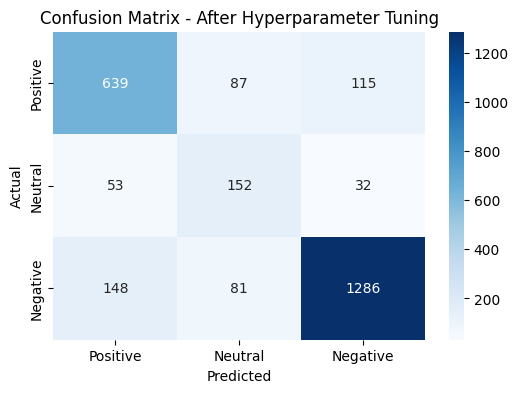

              precision    recall  f1-score   support

    Negative       0.90      0.85      0.87      1515
     Neutral       0.47      0.64      0.55       237
    Positive       0.76      0.76      0.76       841

    accuracy                           0.80      2593
   macro avg       0.71      0.75      0.73      2593
weighted avg       0.81      0.80      0.81      2593



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Grid parameter yang akan dicoba
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear cocok untuk L1 dan L2
}

# Inisialisasi model dasar
logreg = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)

# Fit pada data hasil SMOTE
grid_search.fit(X_train_resampled, y_train_resampled)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi ulang
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - After Hyperparameter Tuning')
plt.show()

# Report
print(classification_report(y_test, y_pred))


##EVAL NO SMOTE

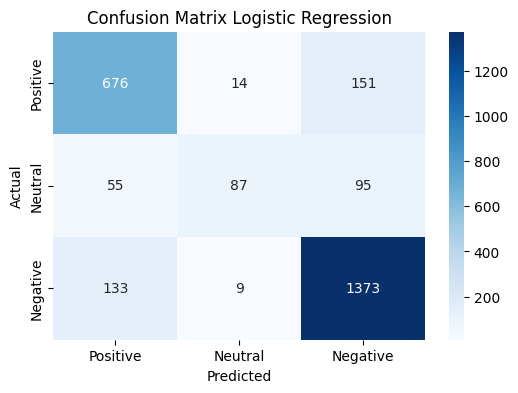

              precision    recall  f1-score   support

    Negative       0.85      0.91      0.88      1515
     Neutral       0.79      0.37      0.50       237
    Positive       0.78      0.80      0.79       841

    accuracy                           0.82      2593
   macro avg       0.81      0.69      0.72      2593
weighted avg       0.82      0.82      0.81      2593



In [18]:
#Testing Cofusion Matrix 80:20

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


# Asumsi dataset df_final_cleaned memiliki teks bersih yang bisa digunakan untuk training
X = df_final_cleaned['translated_text']  # Fitur: teks bersih
y = df_final_cleaned['Sentiment']  # Gunakan label dari VADER sebagai target sementara

# Ubah teks menjadi vektor TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi di test set
y_pred = model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


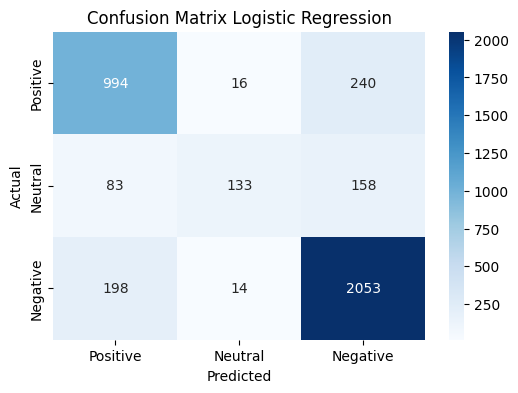

              precision    recall  f1-score   support

    Negative       0.84      0.91      0.87      2265
     Neutral       0.82      0.36      0.50       374
    Positive       0.78      0.80      0.79      1250

    accuracy                           0.82      3889
   macro avg       0.81      0.69      0.72      3889
weighted avg       0.82      0.82      0.81      3889



In [19]:
#Testing Cofusion Matrix 70:30

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


# Asumsi dataset df_final_cleaned memiliki teks bersih yang bisa digunakan untuk training
X = df_final_cleaned['translated_text']  # Fitur: teks bersih
y = df_final_cleaned['Sentiment']  # Gunakan label dari VADER sebagai target sementara

# Ubah teks menjadi vektor TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi di test set
y_pred = model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


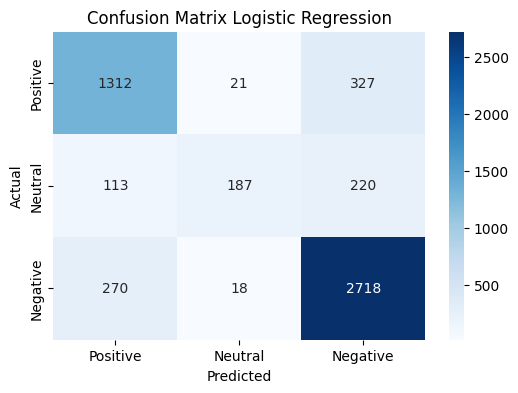

              precision    recall  f1-score   support

    Negative       0.83      0.90      0.87      3006
     Neutral       0.83      0.36      0.50       520
    Positive       0.77      0.79      0.78      1660

    accuracy                           0.81      5186
   macro avg       0.81      0.68      0.72      5186
weighted avg       0.81      0.81      0.80      5186



In [20]:
#Testing Cofusion Matrix 60:40

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


# Asumsi dataset df_final_cleaned memiliki teks bersih yang bisa digunakan untuk training
X = df_final_cleaned['translated_text']  # Fitur: teks bersih
y = df_final_cleaned['Sentiment']  # Gunakan label dari VADER sebagai target sementara

# Ubah teks menjadi vektor TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.4, random_state=42)

# Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi di test set
y_pred = model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
